In [3]:
import supy as sp

path_runcontrol_estm = "./RunControl.nml"
path_runcontrol_ohm = "./RunControl_OHM.nml"

In [4]:
df_state_init_estm = sp.init_supy(path_runcontrol_estm)
df_state_init_ohm = sp.init_supy(path_runcontrol_ohm)

2023-05-16 11:02:39,240 - SuPy - INFO - All cache cleared.
2023-05-16 11:02:40,575 - SuPy - INFO - All cache cleared.


In [5]:
df_forcing = sp.util.read_forcing("./Input/Saeve_asphalt_2004_data_60.txt", tstep_mod=300)

In [6]:
df_output_estm, df_state_final_estm = sp.run_supy(df_forcing, df_state_init_estm, save_state=False)
df_output_ohm, df_state_final_ohm = sp.run_supy(df_forcing, df_state_init_ohm, save_state=False)

2023-05-16 11:02:42,651 - SuPy - INFO - ====================
2023-05-16 11:02:42,652 - SuPy - INFO - Simulation period:
2023-05-16 11:02:42,654 - SuPy - INFO -   Start: 2004-02-12 00:05:00
2023-05-16 11:02:42,655 - SuPy - INFO -   End: 2004-04-14 21:00:00
2023-05-16 11:02:42,657 - SuPy - INFO - 
2023-05-16 11:02:42,657 - SuPy - INFO - No. of grids: 1
2023-05-16 11:02:42,658 - SuPy - INFO - SuPy is running in serial mode
2023-05-16 11:02:51,406 - SuPy - INFO - Execution time: 8.8 s
2023-05-16 11:02:51,407 - SuPy - INFO - ====================

2023-05-16 11:02:51,408 - SuPy - INFO - ====================
2023-05-16 11:02:51,409 - SuPy - INFO - Simulation period:
2023-05-16 11:02:51,411 - SuPy - INFO -   Start: 2004-02-12 00:05:00
2023-05-16 11:02:51,412 - SuPy - INFO -   End: 2004-04-14 21:00:00
2023-05-16 11:02:51,413 - SuPy - INFO - 
2023-05-16 11:02:51,414 - SuPy - INFO - No. of grids: 1
2023-05-16 11:02:51,415 - SuPy - INFO - SuPy is running in serial mode
2023-05-16 11:02:55,222 - Su

In [7]:
Ts_ohm = df_output_ohm.loc[1, "ESTMExt"]["Ts_Paved"].resample("H").mean().values
Ts_ehc = df_output_estm.loc[1, "ESTMExt"]["Ts_Paved"].resample("H").mean().values

In [9]:
import pandas as pd

ref_df = pd.read_table("./Input/Saeve_asphalt1_2004_ESTM_Ts_data_60.txt", index_col=0, parse_dates=True)

In [10]:
Ts_ref = ref_df["Troad"].values

4.4063877130794555
4.4063877130794555


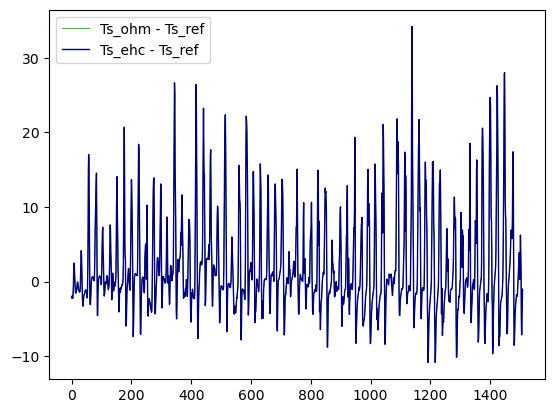

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(Ts_ohm[1:] - Ts_ref, label="Ts_ohm - Ts_ref", color="green", linewidth=0.5)
plt.plot(Ts_ehc[1:] - Ts_ref, label="Ts_ehc - Ts_ref", color="navy", linewidth=1.0)
print(np.mean(np.abs(Ts_ohm[1:] - Ts_ref)))
print(np.mean(np.abs(Ts_ehc[1:] - Ts_ref)))
# plt.plot(Ts_ref, label="Ts_ref", color="red")
plt.legend()
plt.show()

In [12]:
print(np.max(np.abs(Ts_ohm - Ts_ehc)))

0.0
